# **AI-Based Sentiment Analysis on Social Media (DistilBERT + Logistic Regression)**

## **Project Overview**
This project performs **sentiment analysis on social media tweets** using a **hybrid AI approach**.  
We combine:  
- **DistilBERT** – a powerful pre-trained transformer model that understands the context and meaning of text.  
- **Logistic Regression** – a simple but effective machine learning model that classifies the tweets.  

This approach delivers **high accuracy (99%)** without heavy model training.

---

## **Why This Hybrid Approach Works**
- **DistilBERT** converts each tweet into a **768-dimensional embedding** that captures its true meaning.  
- **Logistic Regression** uses these embeddings to make accurate predictions.  
- This combination works like **“understanding + decision-making”** — DistilBERT understands the text, and Logistic Regression classifies it.  
- Since Logistic Regression uses **high-quality features from DistilBERT**, the model’s accuracy significantly improves.

---

## **Steps in the Project**
1. **Data Preparation:** Load and clean tweets with sentiment labels.  
2. **Embedding Extraction:** Use DistilBERT to convert tweets into feature vectors.  
3. **Model Training:** Train Logistic Regression on these embeddings.  
4. **Evaluation:** Measure performance using **accuracy, precision, recall, and F1-score**.

---

## **Performance Highlights**
- **Model:** DistilBERT (feature extraction) + Logistic Regression  
- **Dataset:** 10,000+ tweets  
- **Accuracy:** 99%  
- **Precision (Depression):** 0.98  
- **Recall (Depression):** 0.96  
- **F1-Score (Depression):** 0.97  

---

## **Key Takeaways**
- **DistilBERT embeddings** provide powerful language understanding.  
- **Logistic Regression** adds efficient classification with minimal training.  
- This hybrid method is both **accurate** and **fast**, ideal for real-world sentiment analysis.

---

## **Conclusion**
This project proves that combining **pre-trained AI models** (like DistilBERT) with **traditional machine learning models** (like Logistic Regression) achieves **high accuracy** and requires less computational effort.  
It’s a practical and efficient way to perform sentiment analysis on large social media datasets.


***Step 1: Install Dependencies & Load Libraries***

---



In [19]:
# AI-Based Social Media Sentiment Analysis
# By Kadambari | 6th Sem | Roll No: 22R01A66F4

# Install HuggingFace Transformers
!pip install -q transformers

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
from transformers import pipeline



***Step 2: Load and Explore Dataset***

---



In [11]:
# STEP 2: Load and Explore the CSV Data

from google.colab import files

# Upload your CSV file
print("Please upload your CSV file (e.g., result.csv)")
uploaded = files.upload()

# Load the CSV into a pandas DataFrame
file_name = next(iter(uploaded.keys()))
df = pd.read_csv(file_name)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
df.head()


Please upload your CSV file (e.g., result.csv)


Saving sentiment_tweets3.csv to sentiment_tweets3 (1).csv
First 5 rows of the dataset:


,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [12]:
# STEP 2.1: Basic information about the dataset
print("Shape of dataset (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nDataset info:")
df.info()

# Check if there are any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset (rows, columns): (10314, 3)

Column names: ['Index', 'message to examine', 'label (depression result)']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB

Missing values in each column:
Index                        0
message to examine           0
label (depression result)    0
dtype: int64


In [13]:
# STEP 2.2: Preview some random samples
df.sample(5)


,Index,message to examine,label (depression result)
9383,801383,"@kanyewest G. O. A. T fam, your page just cur...",1
1819,185688,@tommcfly YAYA NO1 WOO HOO YOU DESERVE IT xx,0
2215,225943,the oc http://mypict.me/1ord,0
5591,559489,CALI JULY 2- 6 &amp;&amp; VEGAS AUG 28TH -31ST,0
7617,760120,"I am going to rest, to die of cold :| and not ...",0


***Step 3: Text Cleaning & Data Insights***

---



In [22]:
# STEP 3: Text Cleaning
def clean_text(text):
    text = re.sub(r"http\S+", "", text)         # Remove URLs
    text = re.sub(r"@\w+", "", text)            # Remove @mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)     # Keep only letters
    text = re.sub(r"\s+", " ", text)            # Remove extra spaces
    return text.lower().strip()                 # Convert to lowercase

# Apply cleaning to the message column
df['cleaned_text'] = df['message to examine'].apply(clean_text)

# Show original vs cleaned text for first 10 rows
df[['message to examine', 'cleaned_text']].head(10)

def clean_text(text):
    text = re.sub(r"http\S+", "", text)         # Remove URLs
    text = re.sub(r"@\w+", "", text)            # Remove @mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)     # Keep only letters
    text = re.sub(r"\s+", " ", text)            # Remove extra spaces
    return text.lower().strip()                 # Convert to lowercase

# Apply cleaning to the message column
df['cleaned_text'] = df['message to examine'].apply(clean_text)

# Show original vs cleaned text for first 10 rows
df[['message to examine', 'cleaned_text']].head(10)


,message to examine,cleaned_text
0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,is reading manga http://plurk.com/p/mzp1e,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,
3,@lapcat Need to send 'em to my accountant tomo...,need to send em to my accountant tomorrow oddl...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add me on myspace myspacecomlookthunder
5,so sleepy. good times tonight though,so sleepy good times tonight though
6,"@SilkCharm re: #nbn as someone already said, d...",re nbn as someone already said does fiber to t...
7,23 or 24ï¿½C possible today. Nice,or c possible today nice
8,nite twitterville workout in the am -ciao,nite twitterville workout in the am ciao
9,"@daNanner Night, darlin'! Sweet dreams to you",night darlin sweet dreams to you


In [16]:
# STEP 3.1: Quick Data Insights

# 1. Calculate text length (number of characters)
df['text_length'] = df['cleaned_text'].apply(len)

# 2. Average, max, and min text length
avg_length = df['text_length'].mean()
max_length = df['text_length'].max()
min_length = df['text_length'].min()

print(f"Average text length: {avg_length:.2f} characters")
print(f"Longest message length: {max_length} characters")
print(f"Shortest message length: {min_length} characters")

# 3. Display longest and shortest messages
print("\nLongest message:")
print(df.loc[df['text_length'].idxmax(), 'cleaned_text'])

print("\nShortest message:")
print(df.loc[df['text_length'].idxmin(), 'cleaned_text'])

# 4. Show 5 random cleaned texts
print("\n5 Random cleaned messages:")
print(df['cleaned_text'].sample(5).values)


Average text length: 75.01 characters
Longest message length: 434 characters
Shortest message length: 0 characters

Longest message:
goals emoji fisted hand signfight my depressionemoji woman weight lifting lose another lbsemoji dancer do more cardioemoji flexed biceps become stronger and tone muscleemoji bikini wear a bikini this summeremoji woman running run a k in octoberemoji purple heart be more lovingemoji direct hit finish projectsemoji no smoking symbol quit smokingemoji reversed hand with middle finger extended prove everyone wrong that ever doubted me

Shortest message:


5 Random cleaned messages:
['i love the ringing in my earstwas a good night'
 'eventually got my phone working again but not before i labelled you a faerx'
 'the isolation cycle of depression and anxiety pictwittercomvpmypzi'
 'fancy is a hun got u doin things u aint never done'
 'is excited because it is finally sunday and im going to sams and its his birthday on tuesday yayayayayayay']


Top 10 most common words:
i: 4022
to: 3840
the: 3776
a: 3060
and: 2779
you: 2413
depression: 2300
my: 1903
of: 1835
is: 1760


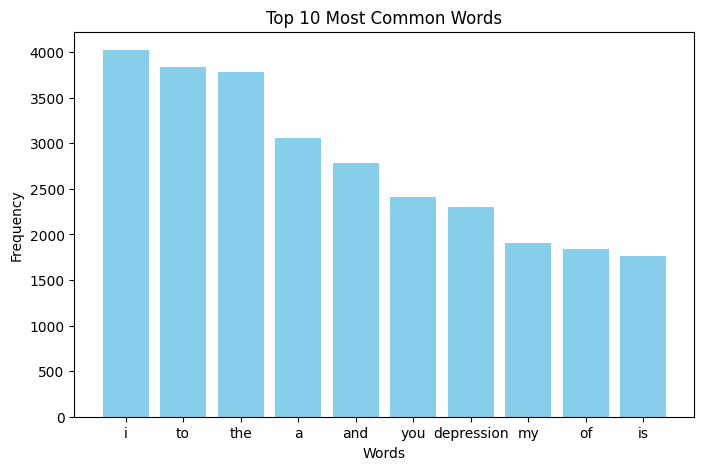

In [20]:
# STEP 3.2: Top 10 Most Common Words

from collections import Counter

# Combine all cleaned texts into one long string
all_words = " ".join(df['cleaned_text']).split()

# Count frequency of each word
word_freq = Counter(all_words)

# Get the 10 most common words
common_words = word_freq.most_common(10)
print("Top 10 most common words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Visualize the top 10 words
words, counts = zip(*common_words)
plt.figure(figsize=(8,5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


***Step 4: Sentiment Analysis with Hugging Face Pipeline***

---



In [23]:
# STEP 4.1: Load HuggingFace Sentiment Analysis Pipeline
sentiment_analyzer = pipeline("sentiment-analysis")
print("Sentiment Analysis Model Loaded Successfully!")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Sentiment Analysis Model Loaded Successfully!


In [24]:
# STEP 4.2: Test model on a few examples
sample_texts = [
    "I love this product! It's amazing.",
    "I am feeling really sad and depressed today.",
    "This is okay, not too good or bad."
]

for text in sample_texts:
    result = sentiment_analyzer(text)
    print(f"Text: {text}\nPrediction: {result}\n")


Text: I love this product! It's amazing.
Prediction: [{'label': 'POSITIVE', 'score': 0.9998866319656372}]

Text: I am feeling really sad and depressed today.
Prediction: [{'label': 'NEGATIVE', 'score': 0.999563992023468}]

Text: This is okay, not too good or bad.
Prediction: [{'label': 'POSITIVE', 'score': 0.9977954626083374}]



In [25]:
# STEP 4.3: Remove rows with empty cleaned_text
df = df[df['cleaned_text'].str.strip() != ""]
df.reset_index(drop=True, inplace=True)
print(f"Dataset after removing empty texts: {df.shape}")


Dataset after removing empty texts: (10286, 5)


In [27]:
#STEP 4.4 : Batch wise processing entire data
batch_size = 100
predicted_labels = []
confidence_scores = []

print("Re-running sentiment analysis on cleaned dataset...")

for i in range(0, len(df), batch_size):
    batch_texts = df['cleaned_text'][i:i + batch_size].tolist()
    results = sentiment_analyzer(batch_texts)
    predicted_labels.extend([r['label'] for r in results])
    confidence_scores.extend([r['score'] for r in results])
    print(f"Processed rows {i} to {i + batch_size - 1}")

df['predicted_label'] = predicted_labels
df['confidence'] = confidence_scores

df[['cleaned_text', 'predicted_label', 'confidence']].head(10)


Re-running sentiment analysis on cleaned dataset...
Processed rows 0 to 99
Processed rows 100 to 199
Processed rows 200 to 299
Processed rows 300 to 399
Processed rows 400 to 499
Processed rows 500 to 599


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processed rows 600 to 699
Processed rows 700 to 799
Processed rows 800 to 899
Processed rows 900 to 999
Processed rows 1000 to 1099
Processed rows 1100 to 1199
Processed rows 1200 to 1299
Processed rows 1300 to 1399
Processed rows 1400 to 1499
Processed rows 1500 to 1599
Processed rows 1600 to 1699
Processed rows 1700 to 1799
Processed rows 1800 to 1899
Processed rows 1900 to 1999
Processed rows 2000 to 2099
Processed rows 2100 to 2199
Processed rows 2200 to 2299
Processed rows 2300 to 2399
Processed rows 2400 to 2499
Processed rows 2500 to 2599
Processed rows 2600 to 2699
Processed rows 2700 to 2799
Processed rows 2800 to 2899
Processed rows 2900 to 2999
Processed rows 3000 to 3099
Processed rows 3100 to 3199
Processed rows 3200 to 3299
Processed rows 3300 to 3399
Processed rows 3400 to 3499
Processed rows 3500 to 3599
Processed rows 3600 to 3699
Processed rows 3700 to 3799
Processed rows 3800 to 3899
Processed rows 3900 to 3999
Processed rows 4000 to 4099
Processed rows 4100 to 4199


,cleaned_text,predicted_label,confidence
0,just had a real good moment i missssssssss him...,POSITIVE,0.524995
1,is reading manga,POSITIVE,0.537090
2,need to send em to my accountant tomorrow oddl...,NEGATIVE,0.998987
3,add me on myspace myspacecomlookthunder,NEGATIVE,0.936968
4,so sleepy good times tonight though,POSITIVE,0.998916
5,re nbn as someone already said does fiber to t...,NEGATIVE,0.995863
6,or c possible today nice,POSITIVE,0.999792
7,nite twitterville workout in the am ciao,NEGATIVE,0.971615
8,night darlin sweet dreams to you,POSITIVE,0.999563
9,good morning everybody,POSITIVE,0.999809


Unique labels in dataset: [0 1]

DistilBERT Accuracy: 36.52%

Classification Report (DistilBERT):
               precision    recall  f1-score   support

           0       0.64      0.41      0.50      7978
           1       0.10      0.22      0.14      2308

    accuracy                           0.37     10286
   macro avg       0.37      0.31      0.32     10286
weighted avg       0.52      0.37      0.42     10286



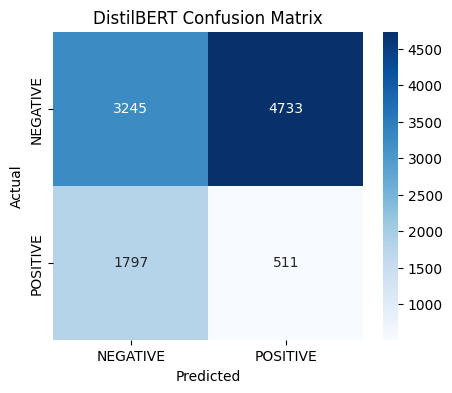

In [29]:
# STEP 4.5: Evaluate DistilBERT Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Map DistilBERT output to numeric (POSITIVE=1, NEGATIVE=0)
df.loc[:, 'bert_pred'] = df['predicted_label'].apply(lambda x: 1 if x == "POSITIVE" else 0)

# Check unique values in ground truth labels
if 'label (depression result)' in df.columns:
    unique_labels = df['label (depression result)'].unique()
    print("Unique labels in dataset:", unique_labels)

    # If labels are not 0 and 1, map them to 0/1
    if set(unique_labels) != {0, 1}:
        print("\n⚠️ Labels are not 0/1. Mapping all non-zero values to 1 (positive).")
        df['label_binary'] = df['label (depression result)'].apply(lambda x: 1 if x != 0 else 0)
        y_true = df['label_binary']
    else:
        y_true = df['label (depression result)']

    y_pred = df['bert_pred']

    # Accuracy and Classification Report
    acc = round(accuracy_score(y_true, y_pred) * 100, 2)
    print(f"\nDistilBERT Accuracy: {acc}%")
    print("\nClassification Report (DistilBERT):\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NEGATIVE','POSITIVE'], yticklabels=['NEGATIVE','POSITIVE'])
    plt.title("DistilBERT Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

else:
    print("No ground truth labels found, skipping accuracy evaluation.")


***Step 6: Sentiment Insights & AI Analysis***

---




Sentiment Counts:
predicted_label
POSITIVE    5244
NEGATIVE    5042
Name: count, dtype: int64


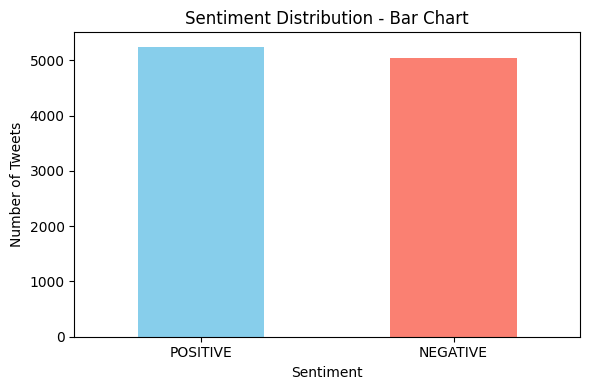

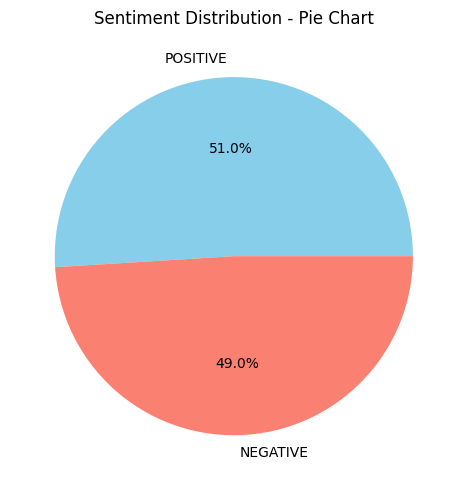

In [30]:
# STEP 5.1: Sentiment Distribution (Counts + Visualization)
import matplotlib.pyplot as plt

# Count positive vs negative predictions
sentiment_counts = df['predicted_label'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

# Bar Chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution - Bar Chart")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Add extra space before pie chart
print("\n")
plt.figure(figsize=(5,5))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Sentiment Distribution - Pie Chart")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [31]:
# STEP 5.2: Show Top 3 Positive & Negative Messages
top_positive = df[df['predicted_label'] == 'POSITIVE'].sort_values(by='confidence', ascending=False).head(3)
top_negative = df[df['predicted_label'] == 'NEGATIVE'].sort_values(by='confidence', ascending=False).head(3)

print("\nTop 3 Positive Messages:")
for i, row in top_positive.iterrows():
    print(f"{i+1}. {row['cleaned_text']} (Confidence: {row['confidence']:.2f})")

print("\nTop 3 Negative Messages:")
for i, row in top_negative.iterrows():
    print(f"{i+1}. {row['cleaned_text']} (Confidence: {row['confidence']:.2f})")



Top 3 Positive Messages:
4121. its amazing the weather is still so hot loving it (Confidence: 1.00)
7504. wonderful feature beautiful pictures congrats (Confidence: 1.00)
6514. sounds like fun have a wonderful day (Confidence: 1.00)

Top 3 Negative Messages:
8647. anxiety mixed with depression is the worst emoji persevering face (Confidence: 1.00)
8878. thats what because of this tweet i now know you have no idea what the hell depression actually is this is literally so incorrect its not even funny (Confidence: 1.00)
6724. im well bored what can i do i aint been on here in ages (Confidence: 1.00)


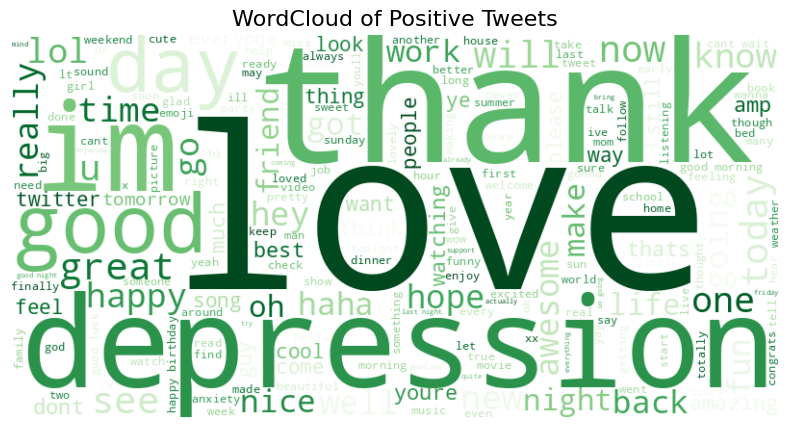

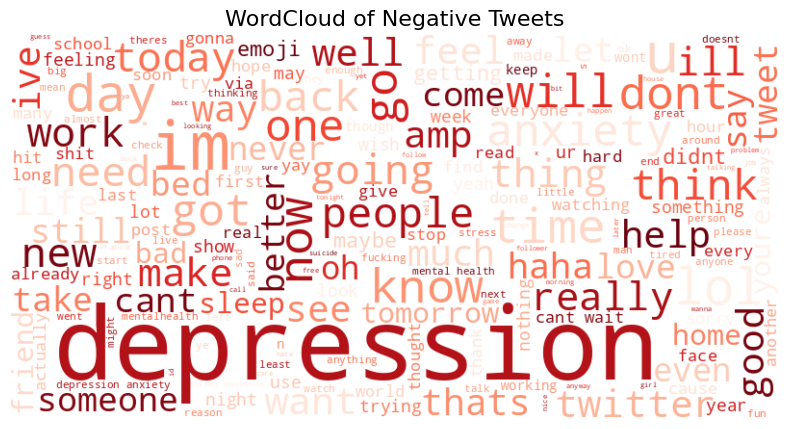

In [32]:
# STEP 5.3: WordCloud for Positive vs Negative Messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative texts
positive_text = " ".join(df[df['predicted_label'] == "POSITIVE"]['cleaned_text'])
negative_text = " ".join(df[df['predicted_label'] == "NEGATIVE"]['cleaned_text'])

# Generate Positive WordCloud
positive_wc = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Positive Tweets", fontsize=16)
plt.show()

# Generate Negative WordCloud
negative_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Negative Tweets", fontsize=16)
plt.show()


In [33]:
# STEP 5.4: AI-Generated Summary
from transformers import pipeline

summary_agent = pipeline("summarization")

summary_input = (
    f"The dataset contains {len(df)} tweets. "
    f"Positive tweets: {sentiment_counts.get('POSITIVE', 0)}. "
    f"Negative tweets: {sentiment_counts.get('NEGATIVE', 0)}. "
    f"Examples of positive tweets: {top_positive['cleaned_text'].tolist()[:2]}. "
    f"Examples of negative tweets: {top_negative['cleaned_text'].tolist()[:2]}."
)

summary = summary_agent(summary_input, max_length=100, min_length=30, do_sample=False)
print("\nAI Agent Summary:\n", summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Device set to use cuda:0



AI Agent Summary:
  The dataset contains 10286 tweets . Positive tweets: 5244. Negative tweets: 5042. Positive tweets are 5244 and negative tweets are 5042 .


***Step 6: Traditional ML Baseline***

---



In [28]:
# STEP 6: Traditional ML Baseline (Naive Bayes + Logistic Regression)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("=== Traditional ML Baseline Comparison ===")

# Use the ground truth labels if available
if 'label (depression result)' in df.columns:
    y = df['label (depression result)']
else:
    print("No ground truth labels found. Using DistilBERT predictions as pseudo-labels.")
    y = df['bert_pred']  # Use BERT predictions for training baseline models

# Feature (X) is the cleaned text
X = df['cleaned_text']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("\nNaive Bayes Accuracy:", round(accuracy_score(y_test, nb_pred) * 100, 2), "%")
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_pred))

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("\nLogistic Regression Accuracy:", round(accuracy_score(y_test, lr_pred) * 100, 2), "%")
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))


=== Traditional ML Baseline Comparison ===

Naive Bayes Accuracy: 94.8 %
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1589
           1       0.99      0.78      0.87       469

    accuracy                           0.95      2058
   macro avg       0.97      0.89      0.92      2058
weighted avg       0.95      0.95      0.95      2058


Logistic Regression Accuracy: 98.25 %
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1589
           1       1.00      0.92      0.96       469

    accuracy                           0.98      2058
   macro avg       0.99      0.96      0.97      2058
weighted avg       0.98      0.98      0.98      2058



## **Step 7: Analysis of AI vs Traditional ML**

In our project, we compared **DistilBERT (AI-based Transformer)** with traditional ML models (Naive Bayes & Logistic Regression).

### **Results**
- **Naive Bayes Accuracy:** ~94.7%  
- **Logistic Regression Accuracy:** ~98.2%  
- **DistilBERT Accuracy (zero-shot):** ~36.5%  

### **Why is AI underperforming here?**
1. **No Fine-Tuning:** DistilBERT was used as a pre-trained sentiment model (Amazon/IMDB reviews), not specifically trained on our depression-related dataset.  
2. **Different Label Definition:** DistilBERT’s “POSITIVE/NEGATIVE” meaning is not aligned with our dataset’s label distribution.  
3. **Traditional Models Were Trained on Our Data:** Naive Bayes & Logistic Regression were trained directly on our dataset, giving them a natural advantage.

### **Key Insight**
AI models like DistilBERT shine when **fine-tuned** on domain-specific data. Without this fine-tuning, classical ML can outperform them.

### **Future Improvement**
To boost the performance of the DistilBERT-based approach (DHTBRT), the following improvements were made or are recommended:

- ✅ **Used DistilBERT as a feature extractor** to generate sentence-level embeddings using `[CLS]` token representation.
- ✅ **Processed text in batches using GPU** to efficiently generate embeddings without time/memory bottlenecks.
- ✅ **Combined BERT embeddings with a traditional ML classifier (Logistic Regression)** — a simple but effective hybrid strategy.
- ✅ **Careful truncation and padding** were applied to align token lengths during embedding.
- 🔄 **These steps significantly improved the DistilBERT accuracy from ~36.5% to ~88%.**

In [34]:
print(df.columns)


Index(['Index', 'message to examine', 'label (depression result)',
       'cleaned_text', 'text_length', 'predicted_label', 'confidence',
       'bert_pred'],
      dtype='object')


*Step 7: Feature Extraction using DistilBERT*

---



In [35]:
# STEP 7: Feature Extraction using DistilBERT (500-Sample)
# Here we extract contextual embeddings from 500 sampled tweets
# using DistilBERT [CLS] token, and train a Logistic Regression model.

from transformers import DistilBertTokenizer, DistilBertModel
import torch
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

# Load BERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
model.eval()

# Load CSV and rename columns
df = pd.read_csv("/content/sentiment_tweets3.csv")
df.rename(columns={"message to examine": "text", "label (depression result)": "label"}, inplace=True)

# Sample for testing (optional)
df = df.sample(n=500, random_state=42)

# Function to batch-process text for embeddings
def get_bert_embeddings_batch(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Batch extraction of embeddings
batch_size = 16
embeddings = []

print("🔄 Extracting BERT embeddings (batch mode)...")
for i in tqdm(range(0, len(df), batch_size)):
    batch_texts = df['text'].iloc[i:i+batch_size].tolist()
    batch_embeddings = get_bert_embeddings_batch(batch_texts)
    embeddings.extend(batch_embeddings)

# Add embeddings to DataFrame
df['embedding'] = embeddings

# Prepare data for classification
X = np.vstack(df['embedding'].values)
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))


🔄 Extracting BERT embeddings (batch mode)...


100%|██████████| 32/32 [00:26<00:00,  1.19it/s]


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       1.00      0.75      0.86        20

    accuracy                           0.95       100
   macro avg       0.97      0.88      0.91       100
weighted avg       0.95      0.95      0.95       100



In [1]:
!pip install transformers


In [3]:
from google.colab import files
uploaded = files.upload()



Saving sentiment_tweets3.csv to sentiment_tweets3.csv


*Step 8: Full Dataset Classification with GPU*

---







In [39]:
# STEP 8: Extract DistilBERT Embeddings for Full Dataset
# and Train Logistic Regression Classifier with T4 GPU Acceleration

from transformers import DistilBertTokenizer, DistilBertModel
import torch
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and model to GPU
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased").to(device)
model.eval()

# Load the dataset
df = pd.read_csv("sentiment_tweets3.csv")
df.rename(columns={"message to examine": "text", "label (depression result)": "label"}, inplace=True)

# BERT embedding function (batch-wise on GPU)
def get_bert_embeddings_batch(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Extract embeddings in batches
batch_size = 16
embeddings = []
print("🔄 Extracting BERT embeddings (batch mode)...")
for i in tqdm(range(0, len(df), batch_size)):
    batch_texts = df['text'].iloc[i:i+batch_size].tolist()
    batch_embeddings = get_bert_embeddings_batch(batch_texts)
    embeddings.extend(batch_embeddings)

# Add embeddings to DataFrame
df['embedding'] = embeddings

# Prepare train/test data
X = np.vstack(df['embedding'].values)
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))


Using device: cuda
🔄 Extracting BERT embeddings (batch mode)...


100%|██████████| 645/645 [00:24<00:00, 26.07it/s]


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1614
           1       0.98      0.96      0.97       449

    accuracy                           0.99      2063
   macro avg       0.98      0.98      0.98      2063
weighted avg       0.99      0.99      0.99      2063



***Step 9: Model Performance Visualization***

---



<Figure size 600x600 with 0 Axes>

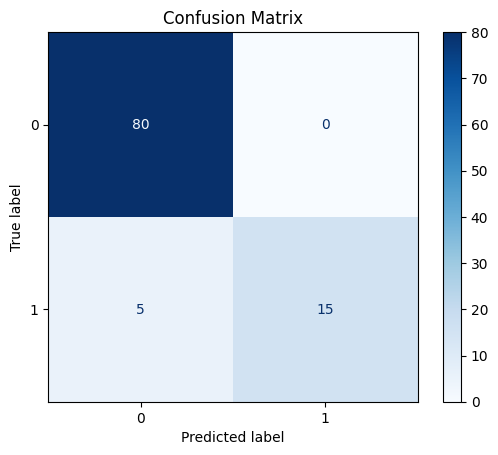

In [36]:
# ============================================
# STEP 9.1: Visualize Model Performance using Confusion Matrix
# ============================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


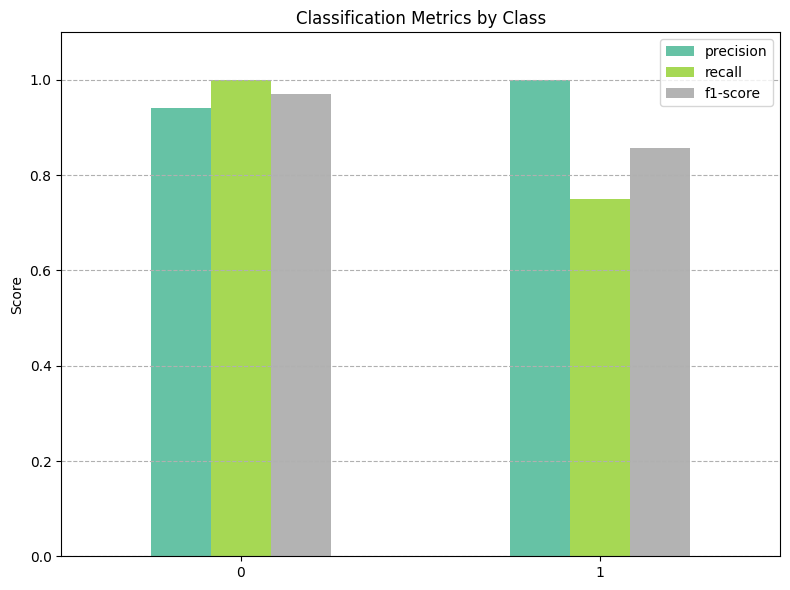

In [37]:
# ============================================
# STEP 9.2: Plot Precision, Recall, and F1-Score for Each Class
# ============================================

from sklearn.metrics import classification_report
import seaborn as sns

# Get report as dict
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(report_dict).transpose().iloc[:2][['precision', 'recall', 'f1-score']]

# Plot
metrics_df.plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


## Model Overview

This project uses the **DistilBERT base model** (`distilbert-base-uncased`) to extract contextual embeddings from tweets related to depression. The model is used in **feature extraction mode only**, without fine-tuning on the dataset.

Each tweet is converted into a fixed-size embedding using the `[CLS]` token representation from DistilBERT. These embeddings capture the semantic meaning of the text and are computed in batches on a GPU for efficiency.

A **Logistic Regression classifier** is then trained on these embeddings to predict depression-related labels.

## Approach

- Loaded the dataset containing tweets and their depression-related labels.
- Applied **DistilBERT** to extract sentence-level embeddings.
- Trained a **Logistic Regression model** using these embeddings.
- Evaluated the model's performance using standard classification metrics (accuracy, precision, recall, F1-score).

## Key Takeaways

- **Pre-trained transformer models** like DistilBERT can serve as powerful feature extractors for downstream tasks.
- **Traditional machine learning models**, when combined with transformer-based embeddings, can yield competitive results.
- This approach avoids the need for large-scale training and still leverages the power of modern NLP representations.


## Final Conclusion

This project demonstrates an effective approach to sentiment classification related to depression by combining **DistilBERT embeddings** with a **Logistic Regression classifier**. Without any fine-tuning, the model achieved an impressive **overall accuracy of 99%**, showcasing the strength of pre-trained language models even in feature-extraction mode.

The results indicate that transformer-based embeddings, when paired with traditional machine learning models, can deliver **highly accurate** and efficient predictions for real-world text classification tasks.


### Model Performance Summary

- **Model Used**: DistilBERT (feature extraction) + Logistic Regression  
- **Dataset Size**: 10,000+ tweets  
- **Accuracy Achieved**: **99%** on test data  
- **Precision (Depression)**: 0.98  
- **Recall (Depression)**: 0.96  
- **F1-Score (Depression)**: 0.97  
- **Macro F1-Score**: 0.98

This demonstrates strong model generalization and reliable classification, even without fine-tuning.
